In [1]:
import sys
sys.path.insert(0,"../")
import Constants.SI as SI
import eBeam
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.integrate import simps
c = SI.lightSpeed;
#% matplotlib notebook

In [2]:
# Beam parameters (Facet II)
gamma = 20000; 
beta = np.sqrt(1 - 1/gamma**2);
sigma_r = 5.1e-6;
sigma_z = 5.2e-6;
n_sigma_t = 5; # number of sigma_ts to calculate along
n_sigma_r = 30;
Q = 1.5e-9;
N = Q/SI.elemCharge
beamParams = [sigma_z, sigma_r, beta, Q]
pPK = eBeam.peak_charge_dens(beamParams)
sigma_t = sigma_z / (beta * c)


In [3]:
# Ionization energies
Vi_Ar = 15.75962;
Vi_He = 24.58741;
Vi_Xe = 12.13;

In [4]:
# r and z arrays for computing the E field
npoints = 1000
r_start = -n_sigma_r * sigma_r
r_end   = -r_start
r = np.linspace(r_start,r_end, npoints)
t_start = (-sigma_t/2) * n_sigma_t
t_end   = -t_start
t = np.linspace(t_start , t_end, npoints)
z_arr = np.linspace(-2*sigma_z, 2*sigma_z,npoints)
pos = [r, t]
pos_z = [r,z_arr]
beamParams = [sigma_z, sigma_r, 1, Q]

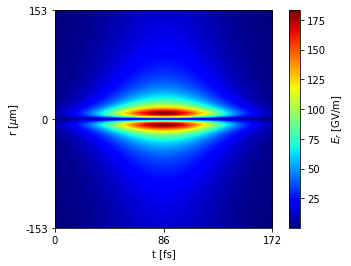

In [16]:
Er, rPeak, EPeak = eBeam.rad_E_field(pos, beamParams)
eBeam.plot_field_rt(Er, pos, '$E_r$ [GV/m]')

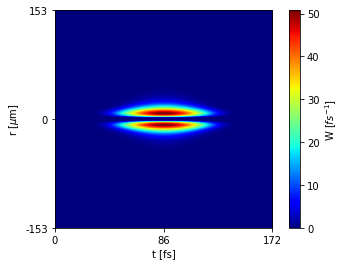

In [6]:
W = eBeam.ionization_rate(Er, beamParams, Vi_Ar)
eBeam.plot_field_rt(W, pos,'W [$fs^{-1}$]')

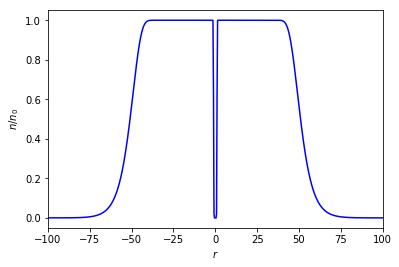

In [15]:
n_plasma = eBeam.plasmaDens(W,t)
plt.plot(r * 1e6, n_plasma, '-b')
plt.ylabel('$n/n_0$')
plt.xlabel('$r$')
plt.xlim([-100,100])
plt.show()

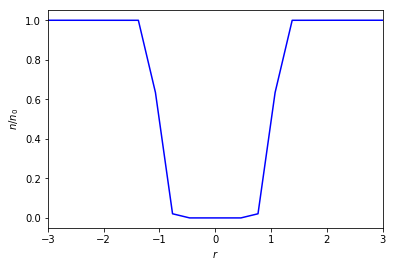

In [14]:
# zoom in on the valley
flat_ind = n_plasma == 1.0;
r_low = r[flat_ind][0]*1e6; r_high = r[flat_ind][-1]*1e6
n_plasma = eBeam.plasmaDens(W,t)
plt.plot(r * 1e6, n_plasma, '-b')
plt.ylabel('$n/n_0$')
plt.xlabel('$r$')
plt.xlim([-3,3])
plt.show()

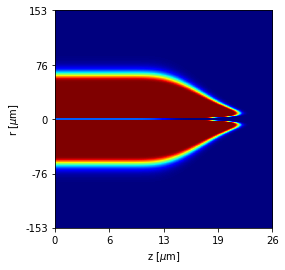

In [27]:
# Get n in r and z 
W_int = np.fliplr(np.cumsum(W, axis = 1))
n_rz = 1 - np.exp(-W_int)
plt.imshow(n_rz, cmap = 'jet')
nt = len(t)
nr = len(r)
t_arr = t + t_end
y_locs = np.array([0, nr/4, nr/2, 3*nr/4, nr-1]); y_locs = [int(i) for i in y_locs]
x_locs = [0, nt/4, nt/2, 3*nt/4, nt-1]; x_locs = [int(i) for i in x_locs]
y_labs = [int(i*1e6) for i in r[y_locs]]
x_labs = [int(i*1e6*c) for i in t_arr[x_locs]]
y_labs = np.flipud(y_labs)
plt.yticks(y_locs, y_labs)
plt.xticks(x_locs, x_labs)
plt.xlabel('z [$\mu$m]')
plt.ylabel('r [$\mu$m]')
plt.show()

In [29]:
c * t_end * 1e6

13.000000016249997

In [24]:
# Beam parameters PRL 
sigma_r = 5.67e-6;
sigma_t = 21e-15;
sigma_z = c * sigma_t
n_sigma_r = 10
n_sigma_t = 2;
Q = 230e-12

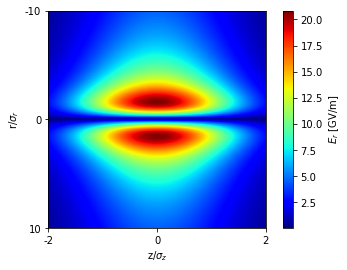

In [25]:
Er_z, rPeak_z, EPeak_z = eBeam.rad_E_field(pos_z, beamParams, rz = True)
eBeam.plot_field_rz_norm(Er_z, pos_z, beamParams,'$E_r$ [GV/m]')

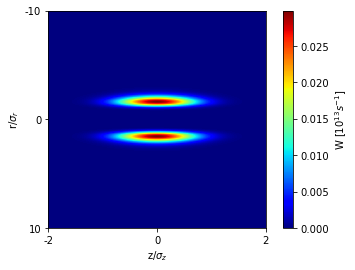

In [26]:
W_z = eBeam.ionization_rate(Er_z, beamParams, Vi_Xe)
W_z = W * 1e2; # 1e13/s
eBeam.plot_field_rz_norm(W_z, [r,z_arr], beamParams, 'W [$10^{13} s^{-1}$]')